Cross-validation scores: [0.96745932 0.97246558 0.97455152 0.97329996 0.96954526]
Mean CV score: 0.9715 (+/- 0.0052)
Accuracy: 0.9703

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      0.99      1.00       147
      banana       0.99      1.00      1.00       129
   blackgram       0.95      0.96      0.95       131
    chickpea       1.00      1.00      1.00       158
     coconut       0.99      0.97      0.98       135
      coffee       0.99      1.00      0.99       132
      cotton       0.95      0.99      0.97       140
      grapes       0.99      1.00      1.00       135
        jute       0.83      0.86      0.85       138
 kidneybeans       1.00      1.00      1.00       146
      lentil       0.92      0.93      0.93       144
       maize       0.99      0.95      0.97       143
       mango       1.00      1.00      1.00       131
   mothbeans       0.95      0.94      0.94       127
    mungbean       0.98      0.

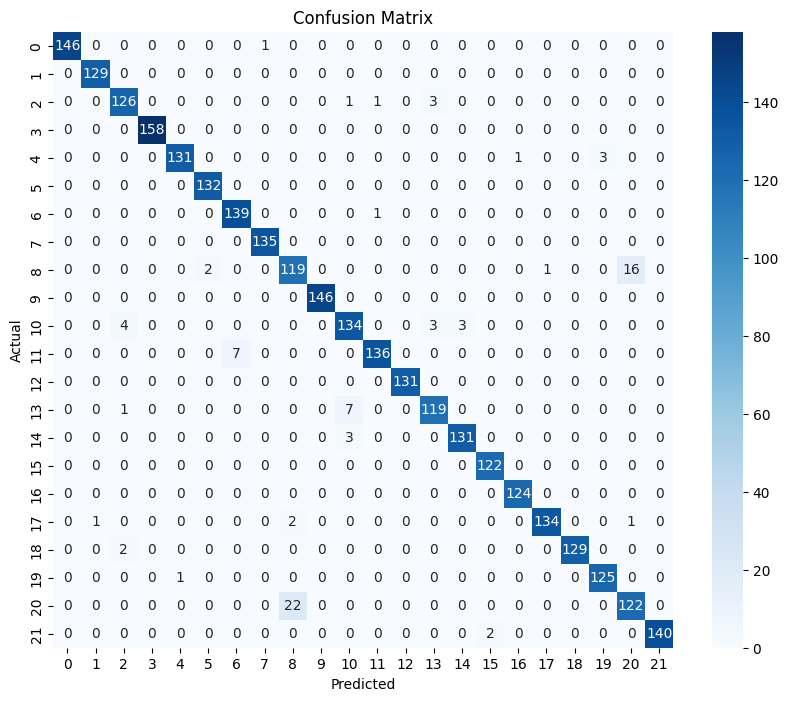


Prediction for new data:
rice


c:\Users\shahp\OneDrive\Desktop\New folder\ipd\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
data = pd.read_csv('2.csv')
X = data.drop('label', axis=1)
y = data['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC()

param_dist = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

random_search = RandomizedSearchCV(svm, param_distributions=param_dist, 
                                   n_iter=20, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_svm = random_search.best_estimator_

cv_scores = cross_val_score(best_svm, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    new_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    new_data_scaled = scaler.transform(new_data)
    prediction = best_svm.predict(new_data_scaled)
    return prediction[0]

print("\nPrediction for new data:")
joblib.dump(best_svm, 'svm.pkl')
print(predict_crop(90, 42, 43, 20.87974371, 82.00274423, 6.502985292, 202.9355362))